In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv("diabetes (2).csv")

EDA---Exploratory Data Analysis

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 - non - diabetic
1 - diabetic

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

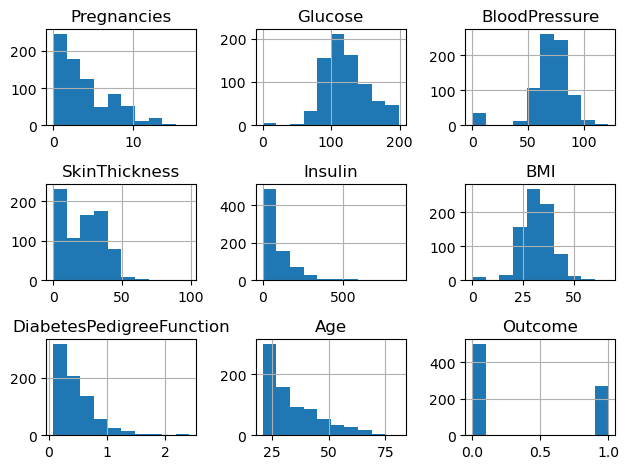

In [11]:
df.hist()
plt.tight_layout()
plt.show

In [12]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [13]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

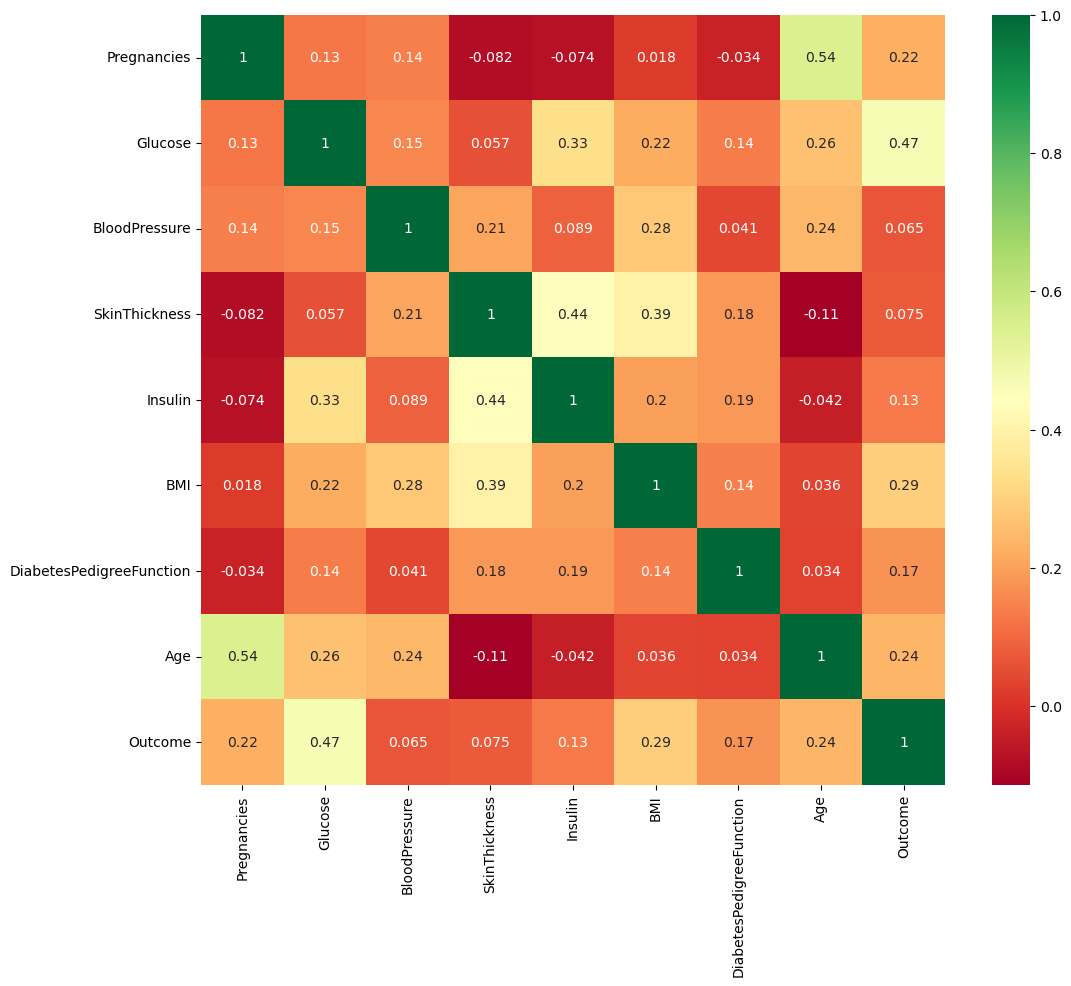

In [16]:
import seaborn as sns
plt.figure(figsize=(12,10))
#using seaborn to plot heatmap
p=sns.heatmap(df.corr(),annot=True,cmap ='RdYlGn')


In [17]:
#  separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [27]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Since our dataset has values in range of 0 to 100 it is better to scale them.

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X = standardized_data
Y = df['Outcome']

In [24]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [28]:
Y_pred = logreg.predict(X_test)
Y_train_pred = logreg.predict(X_train)
Y_train_prob = logreg.predict_proba(X_train)[:,1]

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve

In [30]:
accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)

print("Accuracy Train:", accuracy_train)
print("Precision Train:", precision_train)
print("Recall Train:", recall_train)
print("F1 Score Train:", f1_train)

Accuracy Train: 0.7850162866449512
Precision Train: 0.7469879518072289
Recall Train: 0.5794392523364486
F1 Score Train: 0.6526315789473685


In [31]:
accuracy_test = accuracy_score(Y_test, Y_pred)
precision_test = precision_score(Y_test, Y_pred)
recall_test = recall_score(Y_test, Y_pred)
f1_test = f1_score(Y_test, Y_pred)

print("Accuracy Test:", accuracy_test)
print("Precision Test:", precision_test)
print("Recall Test:", recall_test)
print("F1 Score Test:", f1_test)

Accuracy Test: 0.7597402597402597
Precision Test: 0.717948717948718
Recall Test: 0.5185185185185185
F1 Score Test: 0.6021505376344085


Train AU-ROC Curve:

AU-ROC Score: 0.7372196261682242


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


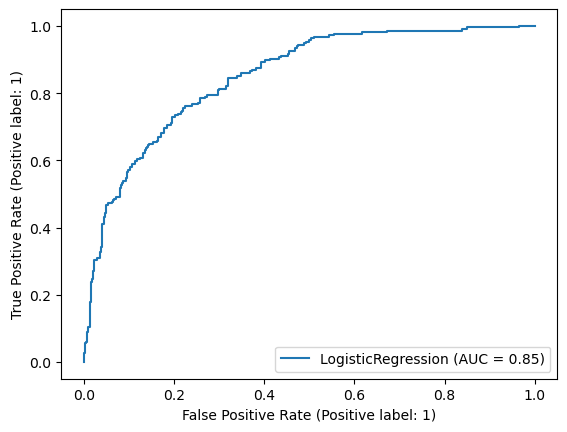

In [32]:
print('Train AU-ROC Curve:')

# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(Y_train, Y_train_prob )
auc_roc = roc_auc_score(Y_train, Y_train_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_train, Y_train)
plt.show()

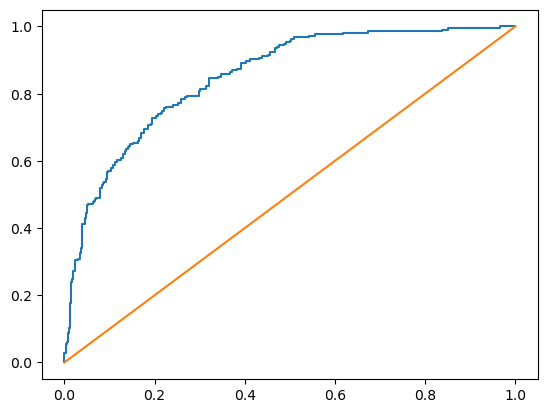

In [33]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.show()

Test AU-ROC Curve:

AU-ROC Score: 0.7042592592592593


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


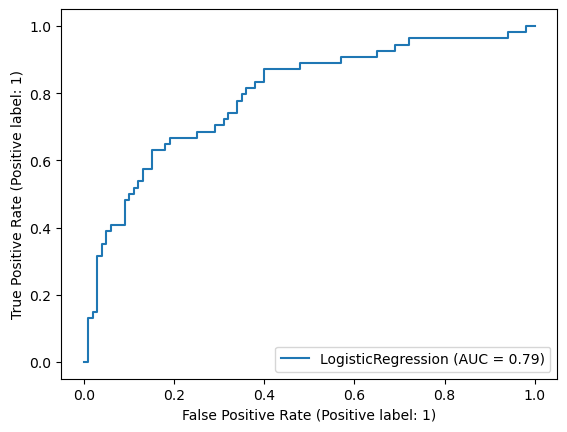

In [34]:
print('Test AU-ROC Curve:')

# Calculate AU-ROC score

auc_roc = roc_auc_score(Y_test, Y_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_test, Y_test)
plt.show()

Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1888)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1888)

In [36]:
Y_pred_dt = decision_tree.predict(X_test)
Y_dt_train = decision_tree.predict(X_train)

In [37]:
accuracy_dt_t = accuracy_score(Y_train, Y_dt_train)
precision_dt_t = precision_score(Y_train, Y_dt_train)
recall_dt_t = recall_score(Y_train, Y_dt_train)
f1_dt_t = f1_score(Y_train, Y_dt_train)

print('Train set metrics:')
print("Accuracy:", accuracy_dt_t)
print("Precision:", precision_dt_t)
print("Recall:", recall_dt_t)
print("F1 Score:", f1_dt_t)

Train set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [38]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

print('Test set metrics:')
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Test set metrics:
Accuracy: 0.7337662337662337
Precision: 0.6382978723404256
Recall: 0.5555555555555556
F1 Score: 0.594059405940594


Interpretation:

Here we can see that the accuracy of train and test for DT model has a huge gap. So, we will tune the DT model

In [39]:
from sklearn.metrics import classification_report

In [40]:
print("Decision Tree")
print(classification_report(Y_test, Y_pred_dt))

Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
decision_tree = DecisionTreeClassifier()

# Defining the parameters to tune

parameters = {
    "max_depth": [1, 3, 5, 7, 9, 10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [43]:
tuning_model = GridSearchCV(decision_tree, param_grid = parameters, scoring = 'accuracy',cv=5)

In [44]:
tuning_model.fit(X_train, Y_train)

# best parameters:

best_params = tuning_model.best_params_

# best model:

best_model = tuning_model.best_estimator_

# Evaluate the performance of the best model

scores = cross_val_score(best_model, X_train, Y_train, cv=5)
mean_accuracy = scores.mean()

print("Best parameters:", best_params)
print("Mean accuracy:", mean_accuracy)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 9}
Mean accuracy: 0.7654404904704786


In [45]:
Y_pred = best_model.predict(X_test)
Y_pred_train = best_model.predict(X_train)

In [46]:
accuracy_t = accuracy_score(Y_train, Y_pred_train)
precision_t = precision_score(Y_train, Y_pred_train, average='macro')
recall_t = recall_score(Y_train, Y_pred_train, average='macro')
f1_t = f1_score(Y_train, Y_pred_train, average='macro')

print('For Train:')
print("Accuracy:", accuracy_t)
print("Precision:", precision_t)
print("Recall:", recall_t)
print("F1-score:", f1_t)

For Train:
Accuracy: 0.7801302931596091
Precision: 0.7650456087547688
Recall: 0.7345560747663551
F1-score: 0.7446041502981005


In [47]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print('For Test:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

For Test:
Accuracy: 0.7402597402597403
Precision: 0.7243408662900188
Recall: 0.6764814814814815
F1-score: 0.6860346585117227


In [48]:
Y_train_proba = best_model.predict_proba(X_train)[:,1]
Y_test_proba = best_model.predict_proba(X_test)[:,1]

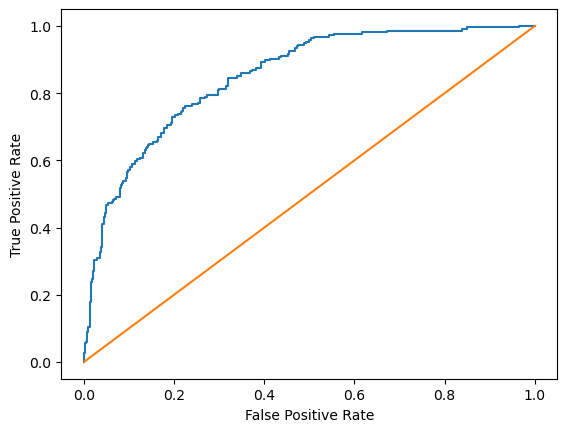


AU-ROC Score train: 0.7345560747663552


In [49]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc1 = roc_auc_score(Y_train, Y_pred_train)
print("\nAU-ROC Score train:", auc_roc1)

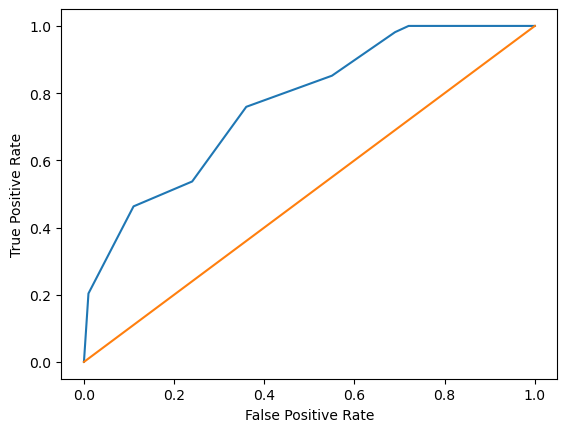


AU-ROC Score test: 0.6764814814814815


In [50]:
# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba )

plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc2 = roc_auc_score(Y_test, Y_pred)
print("\nAU-ROC Score test:", auc_roc2)